<a href="https://colab.research.google.com/github/Tulipraaj/Crypto-Currency-Research/blob/main/BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sys

import plotly.graph_objects as go


In [2]:
df = pd.read_csv("BTC_DATA.csv")

In [3]:
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1.629331e+09,45078.00,44558.50,44714.54,1337.53,59869116.98,45062.30,direct,NaN
1,1.629335e+09,45184.81,44886.98,45062.30,825.61,37196895.36,44964.06,direct,NaN
2,1.629338e+09,44964.06,44603.66,44964.06,891.77,39899338.14,44605.24,direct,NaN
3,1.629342e+09,44614.96,44065.95,44605.24,1755.79,77735458.00,44076.87,direct,NaN
4,1.629346e+09,44324.04,43982.21,44076.87,1447.59,63875253.19,44144.70,direct,NaN


In [4]:
df["time"] = pd.to_datetime(df["time"],unit='s')

In [5]:
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2021-08-19 00:00:00,45078.00,44558.50,44714.54,1337.53,59869116.98,45062.30,direct,NaN
1,2021-08-19 01:00:00,45184.81,44886.98,45062.30,825.61,37196895.36,44964.06,direct,NaN
2,2021-08-19 02:00:00,44964.06,44603.66,44964.06,891.77,39899338.14,44605.24,direct,NaN
3,2021-08-19 03:00:00,44614.96,44065.95,44605.24,1755.79,77735458.00,44076.87,direct,NaN
4,2021-08-19 04:00:00,44324.04,43982.21,44076.87,1447.59,63875253.19,44144.70,direct,NaN


In [6]:
df.tail()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
32903,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32904,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32905,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32906,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32907,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

time                20908
high                20908
low                 20908
open                20908
volumefrom          20908
volumeto            20908
close               20908
conversionType      20908
conversionSymbol    32903
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32908 entries, 0 to 32907
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              12000 non-null  datetime64[ns]
 1   high              12000 non-null  float64       
 2   low               12000 non-null  float64       
 3   open              12000 non-null  float64       
 4   volumefrom        12000 non-null  float64       
 5   volumeto          12000 non-null  float64       
 6   close             12000 non-null  float64       
 7   conversionType    12000 non-null  object        
 8   conversionSymbol  5 non-null      object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.3+ MB


In [9]:
df.drop(df.tail(20908).index,inplace=True)

In [10]:
new_df = df.drop(['conversionType','conversionSymbol'],axis=1)

In [11]:
df.drop(df.tail(1).index,inplace=True)

In [12]:
new_df.tail()

,time,high,low,open,volumefrom,volumeto,close
11995,2022-12-31 19:00:00,16575.32,16558.58,16566.65,1706.73,28275078.07,16561.76
11996,2022-12-31 20:00:00,16564.56,16557.19,16561.76,1016.71,16835700.04,16558.93
11997,2022-12-31 21:00:00,16560.79,16540.06,16558.93,1434.99,23748498.06,16542.96
11998,2022-12-31 22:00:00,16556.14,16487.05,16542.96,2343.40,38718671.54,16513.48
11999,2022-12-31 23:00:00,16540.12,16489.61,16513.48,1565.81,25861336.28,16531.31


In [13]:
new_df.dtypes

time          datetime64[ns]
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
close                float64
dtype: object

<Axes: >

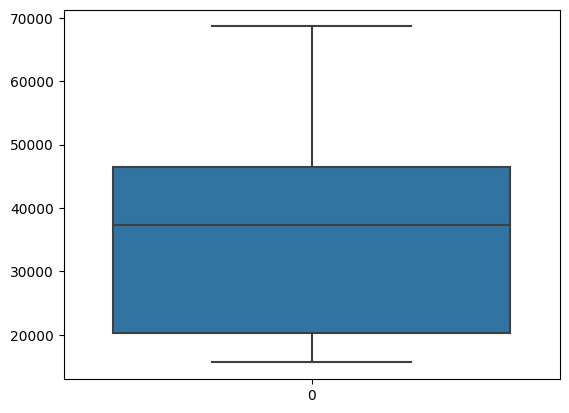

In [14]:
sns.boxplot(new_df['close'])

<Axes: >

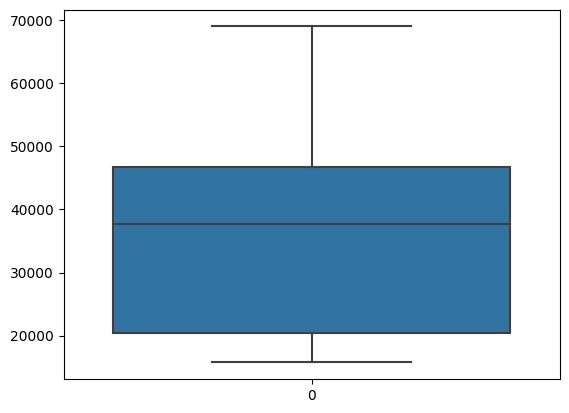

In [15]:
sns.boxplot(new_df['high'])

<Axes: >

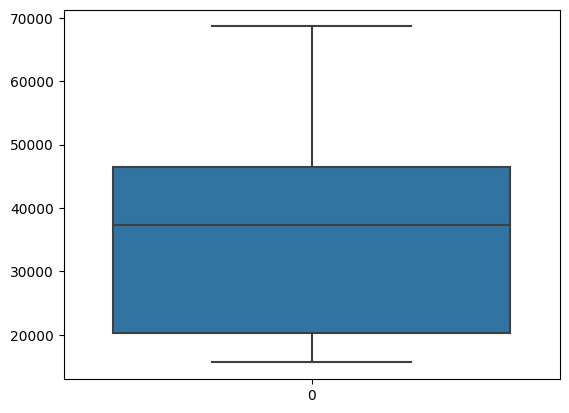

In [16]:
sns.boxplot(new_df['close'])

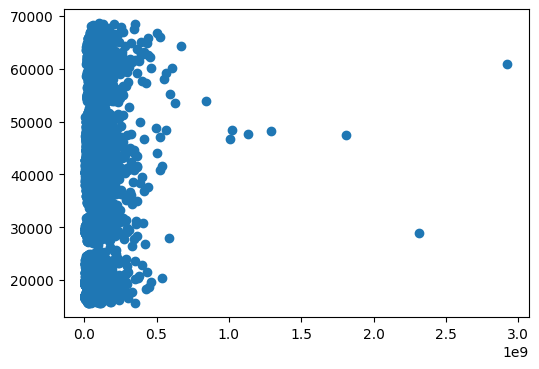

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(new_df['volumeto'],new_df['close'])
plt.show()

In [18]:


# Assuming you have a DataFrame named 'btc_data' with columns 'Open', 'High', 'Low', 'Close', and 'Volume'

# Define the minimum and maximum values for each feature
min_values = new_df[['open', 'high', 'low', 'close', 'volumefrom']].min()
max_values = new_df[['open', 'high', 'low', 'close', 'volumefrom']].max()

# Min-Max normalization formula: (x - min) / (max - min)
df_data_normalized = (new_df[['open', 'high', 'low', 'close', 'volumefrom']] - min_values) / (max_values - min_values)

# Replace any NaN values with 0 (occurs when min and max are the same for a column)
df_data_normalized.fillna(0, inplace=True)

# You can now use 'btc_data_normalized' for your analysis or modeling.


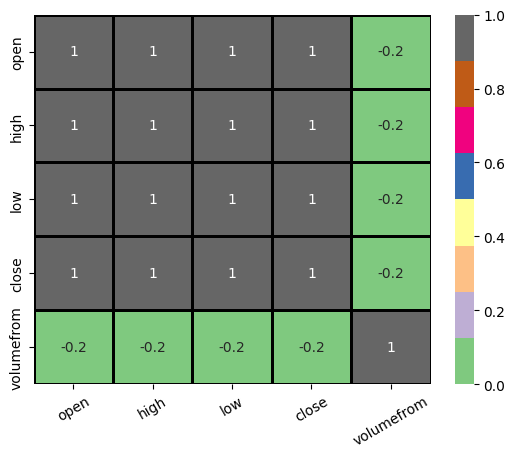

In [19]:
corrmat = df_data_normalized.corr()
fig = plt.figure()
hmap = sns.heatmap(corrmat, vmax = 1, annot = True,vmin=0, cmap='Accent',fmt='.1g',linewidths=1, linecolor='black',xticklabels= True, yticklabels=True)
hmap.set_xticklabels(corrmat, rotation=30)
plt.show()

In [21]:
df_data_normalized['time'] = new_df['time']

In [22]:
df_data_normalized.head()

,open,high,low,close,volumefrom,time
0,0.548814,0.551013,0.548804,0.555376,0.015286,2021-08-19 00:00:00
1,0.555376,0.553020,0.555004,0.553522,0.008879,2021-08-19 01:00:00
2,0.553522,0.548873,0.549657,0.546751,0.009707,2021-08-19 02:00:00
3,0.546751,0.542315,0.539508,0.536780,0.020521,2021-08-19 03:00:00
4,0.536780,0.536850,0.537928,0.538060,0.016664,2021-08-19 04:00:00


In [24]:
df_data_normalized.corr()

<ipython-input-24-dba334dccebb>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,open,high,low,close,volumefrom
open,1.000000,0.999919,0.999902,0.999847,-0.190925
high,0.999919,1.000000,0.999857,0.999925,-0.186803
low,0.999902,0.999857,1.000000,0.999916,-0.196716
close,0.999847,0.999925,0.999916,1.000000,-0.191735
volumefrom,-0.190925,-0.186803,-0.196716,-0.191735,1.000000


In [23]:
fig = px.area(df_data_normalized, x="time", y="volumefrom")
fig.show()

In [25]:
fig = px.area(df_data_normalized, x="time", y="close")
fig.show()

In [26]:
fig = px.area(df_data_normalized, x="time", y="open")
fig.show()

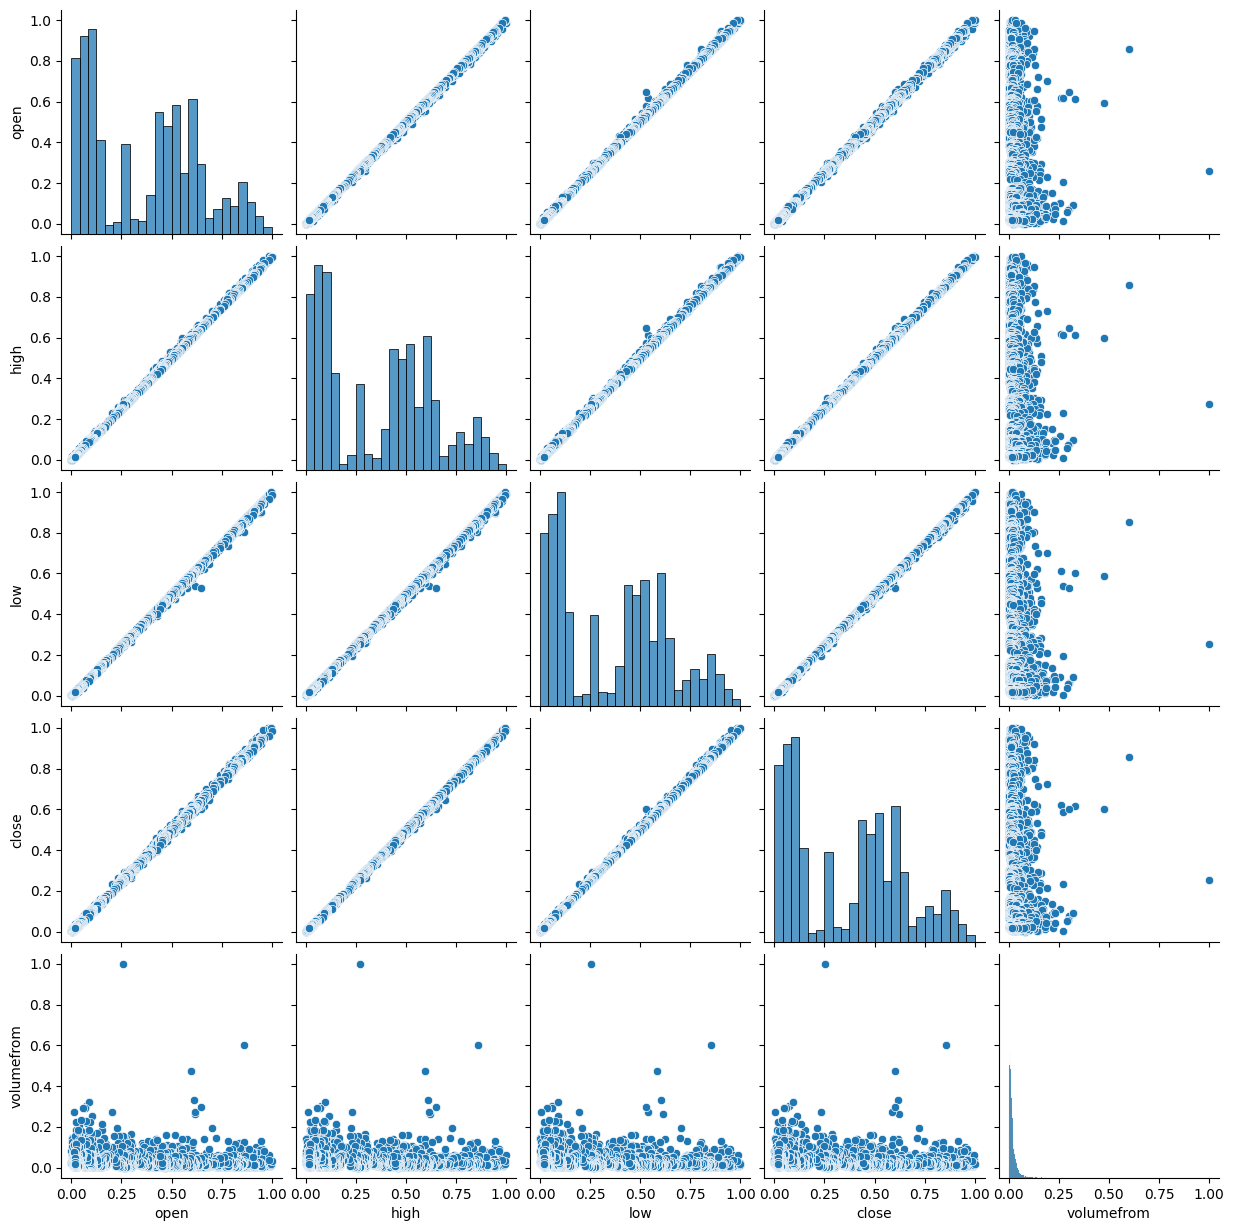

In [27]:
sns.pairplot(data=df_data_normalized)

In [40]:
fig = go.Figure(data=[go.Candlestick(x=new_df['time'],
                                    open=new_df['open'],
                                    high=new_df['high'],
                                    low=new_df['low'],
                                    close=new_df['close'])])

fig.update_layout(title='Bitcoin Candlestick Chart',
                  xaxis_title='Time',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()


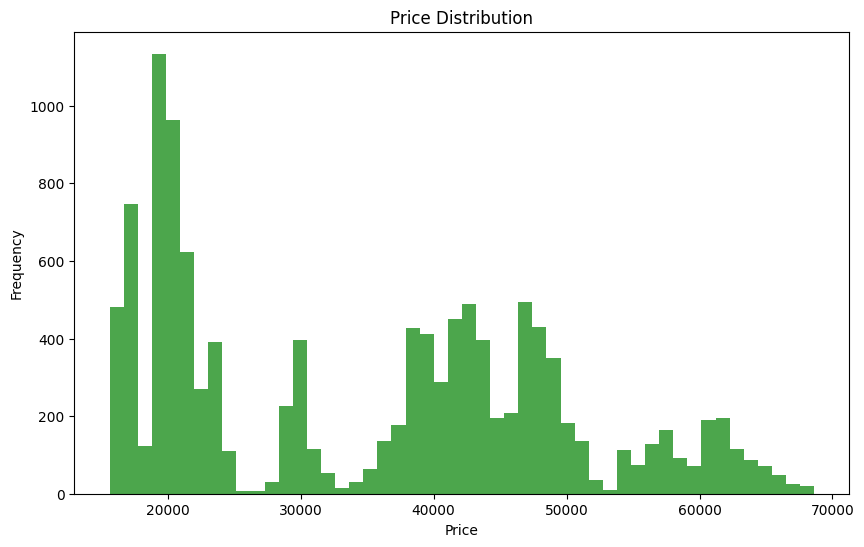

In [41]:
# Histogram to visualize the distribution of price data
plt.figure(figsize=(10, 6))
plt.hist(new_df['close'], bins=50, color='green', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


In [42]:
data = new_df['close']

fig = go.Figure(data=[go.Histogram(x=data, nbinsx=30, marker=dict(color='blue'))])

fig.update_layout(title='Customized Close Price Histogram',
                  xaxis_title='Price',
                  yaxis_title='Frequency',
                  bargap=0.1)

fig.show()


<ipython-input-43-5044a23d6082>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



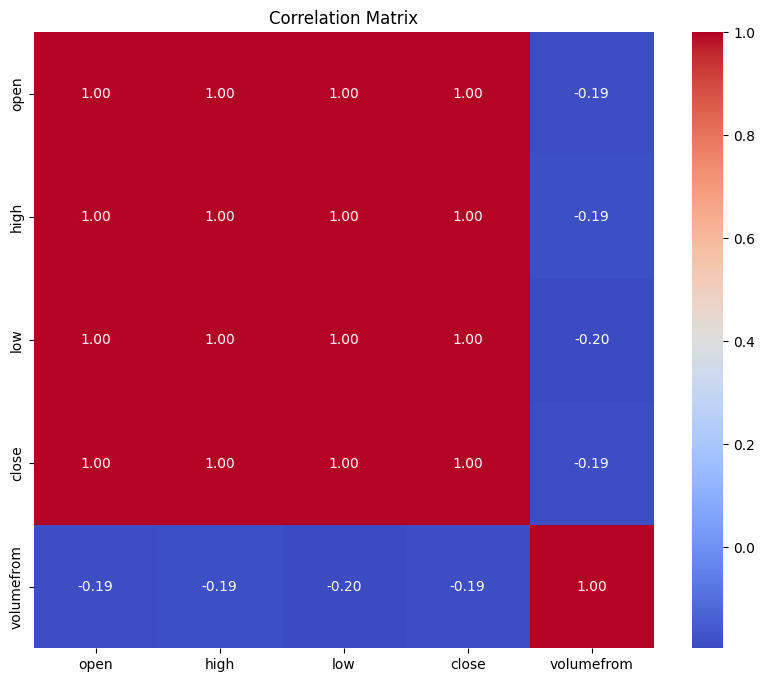

In [43]:
# Heatmap to visualize correlations between features
correlation_matrix = df_data_normalized.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


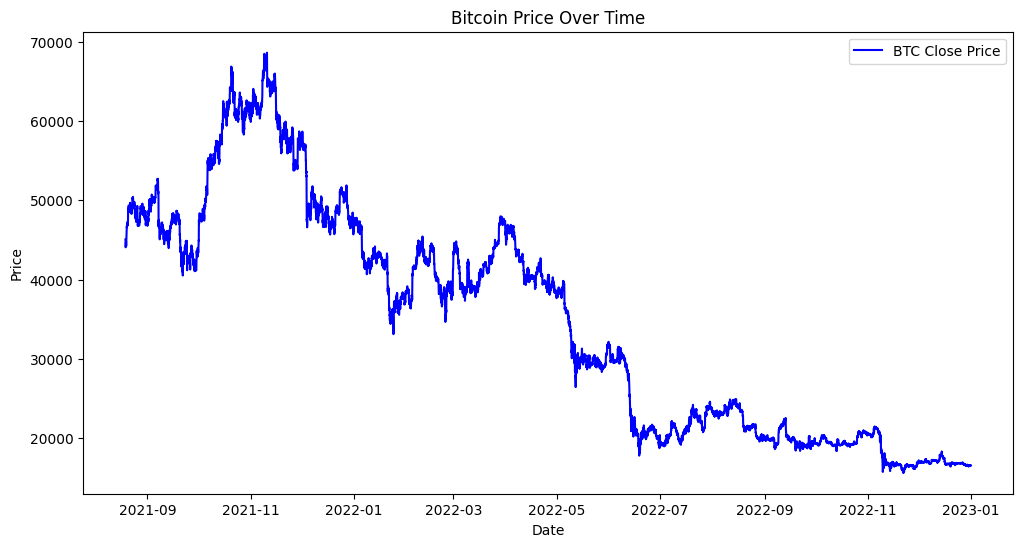

In [44]:
new_df.set_index('time', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(new_df['close'], label='BTC Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.show()